<a href="https://colab.research.google.com/github/LaizaCostaa/previsao_preco_imoveis/blob/main/previsao_imoveis_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONTEXTO**


A House Rocket é uma plataforma digital que tem como modelo de negócio a compra e venda de imóveis usando tecnologia.


O objetivo deste projeto é ajudar a empresa encontrar as melhores oportunidades de negócio no mercado de imóveis, visando maximizar seus lucros


A principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.


Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços. Portanto, nessa análise, buscaremos responder as seguinte perguntas:


1.	Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
2.	Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
3.	A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças?"


**METADADOS**




* 	bathrooms: Número de banheiros, onde .5 representa um quarto com vaso sanitário, mas sem chuveiro.
*   bedrooms: Número de quartos.
*   condition: Índice de 1 a 5 que indica a condição do apartamento.
*   date: Data da venda do imóvel.
*   floors: Número de andares.
*   grade: Índice de 1 a 13 que indica a qualidade da construção e do design.
*   lat: Latitude.
*   long: Longitude.
*   price: Preço de venda de cada imóvel.
*   sqft_above: Metragem quadrada do espaço interno habitável acima do nível do solo.
*   sqft_basement: Metragem quadrada do espaço interno habitável abaixo do nível do solo.
*   sqft_living: Metragem quadrada do espaço interno habitável do apartamento.
*   sqft_living15: Metragem quadrada do espaço interno habitável das 15 residências vizinhas mais próximas.
*   sqft_lot: Metragem quadrada do terreno.
*   sqft_lot15: Metragem quadrada dos terrenos das 15 residências vizinhas mais próximas.
*   view: Índice de 0 a 4 que indica a qualidade da vista da propriedade.
*   waterfront: Variável binária que indica se o apartamento tem vista para a orla marítima.
*   yr_built: Ano em que a casa foi construída.
*   yr_renovated: Ano da última reforma da casa.
*   zipcode: Área do código postal em que a casa está localizada.


verified from 2 sources:
https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices
https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.htm



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Portfólio/Portfólio Python/kc_house_data.csv'
dados = pd.read_csv(file_path)
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
# Gerar o relatório de análise
report = sv.analyze(dados)

# Exibir o relatório no notebook
report.show_html("relatorio_sweetviz.html")  # O arquivo HTML será gerado

                                             |          | [  0%]   00:00 -> (? left)

Report relatorio_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from google.colab import files

In [ ]:

files.download('relatorio_sweetviz.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. Correlação entre Variáveis: A matriz de correlação foi gerada para medir o grau de associação entre as variáveis numéricas. As correlações são representadas em uma escala de -1 a 1, onde valores próximos a 1 indicam uma forte correlação positiva e valores próximos a -1 indicam uma correlação negativa. Nesse contexto, as variáveis mais fortemente correlacionadas com o preço dos imóveis foram sqft_living (área útil do imóvel), grade (qualidade do design e construção), e bathrooms (número de banheiros). Essas variáveis mostram uma relação positiva com o preço, sugerindo que imóveis maiores e de melhor qualidade têm um valor mais alto.

2. Visualizações: Gráficos foram utilizados para entender melhor a distribuição das principais variáveis. Por exemplo, histogramas para a variável price mostraram que a maioria dos preços está concentrada em valores mais baixos, enquanto poucos imóveis são extremamente caros (outliers). Além disso, gráficos de dispersão e boxplots ajudaram a visualizar a relação entre variáveis como sqft_living e price, evidenciando que imóveis com maior área tendem a ter um preço mais elevado.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

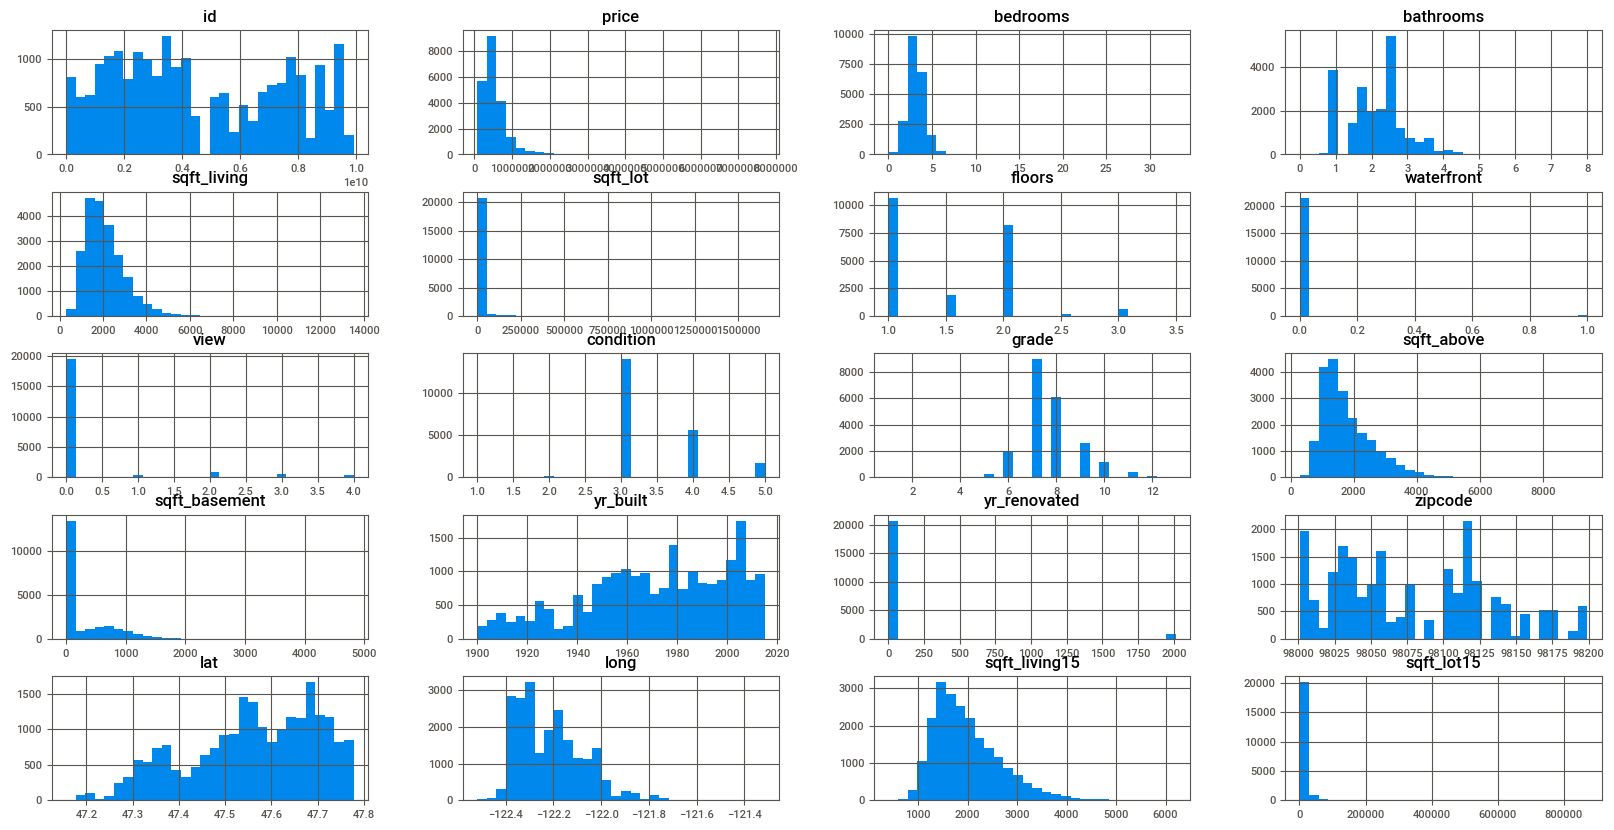

In [ ]:
dados.hist(bins=30, figsize=(20,10))

# PRÉ-PROCESSAMENTO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Verificar as colunas do DataFrame
print(dados.columns)

# 1. Tratar valores ausentes (Preenchimento dos valores ausentes)
# Exemplo de preenchimento para colunas numéricas (preenchendo com a mediana)
dados.fillna(dados.median(numeric_only=True), inplace=True)

# Exemplo de preenchimento para colunas categóricas (preenchendo com a moda)
for column in dados.select_dtypes(include=['object']).columns:
    dados[column].fillna(dados[column].mode()[0], inplace=True)

# 2. Separação entre variáveis dependentes e independentes
X = dados.drop('price', axis=1)  # 'price' é a variável dependente
y = dados['price']

# 3. Remoção de outliers (baseado em desvio padrão ou IQR)
# Remover outliers com base no IQR (Intervalo Interquartil) para a coluna 'price'
Q1 = dados['price'].quantile(0.25)
Q3 = dados['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para remoção de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrando os dados para remover os outliers
dados_sem_outliers = dados[(dados['price'] >= lower_bound) & (dados['price'] <= upper_bound)]

# Verificar o tamanho do dataset após a remoção de outliers
print(f"Tamanho do dataset original: {dados.shape}")
print(f"Tamanho do dataset após remoção de outliers: {dados_sem_outliers.shape}")


# Confirmar que os dados estão prontos para uso
print("Pré-processamento completo. Dados prontos para uso em modelos.")


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Tamanho do dataset original: (21613, 20)
Tamanho do dataset após remoção de outliers: (20467, 20)
Pré-processamento completo. Dados prontos para uso em modelos.


In [ ]:
dados

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Remover colunas que contêm informações de data (convertidas para booleano)
colunas_data = [coluna for coluna in dados.columns if 'date_' in coluna]

# Remover as colunas de data
dados = dados.drop(columns=colunas_data)

# Verificar as colunas restantes
print(dados.columns)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
dados

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**APLICANDO O MODELO**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Separação entre treino e teste
X = dados_sem_outliers.drop('price', axis=1)
y = dados_sem_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Normalização dos dados (Standard Scaling)
scaler = StandardScaler()

# Aplicar a normalização aos dados de treino e teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#definir o modelo
rf = RandomForestRegressor()

In [ ]:
# Definir o Grid de Hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
#Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)#

In [ ]:
# Ajuste do GridSearchCV nos dados de treino
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
# Acessando o melhor modelo treinado
best_rf_model = grid_search.best_estimator_

# Etapa 7: Avaliar o modelo
y_pred = best_rf_model.predict(X_test)

In [ ]:
#previsões e os valores reais
print("Previsões: ", y_pred[:10])  # Exibe as 10 primeiras previsões
print("Valores reais: ", y_test[:10].values)  # Exibe os 10 primeiros valores reais correspondentes

Previsões:  [497020.16731    327463.73932804 311618.77540887 718761.66949829
 243197.80352803 393790.4327684  219104.81291659 649886.54139286
 292199.97371573 607330.74643254]
Valores reais:  [420000. 230000. 270000. 807000. 225000. 410000. 135000. 550000. 289000.
 575000.]


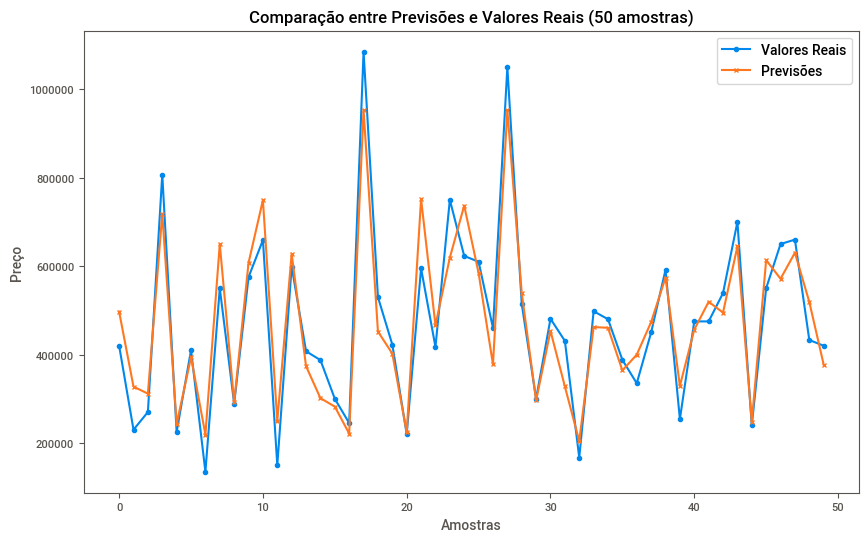

In [ ]:
# Comparar as previsões com os valores reais
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Valores Reais', marker='o')
plt.plot(y_pred[:50], label='Previsões', marker='x')
plt.title('Comparação entre Previsões e Valores Reais (50 amostras)')
plt.xlabel('Amostras')
plt.ylabel('Preço')
plt.legend()
plt.show()